# Data Preprocessing Project

## Overview

The objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning applications.

## Dataset

The dataset used in this project can be found at the following link:

- [Employee Dataset](https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view?usp=sharing)

## Key Components

The project is structured into several key components:

### 1. Data Exploration

- Explore the dataset to understand its structure and contents.
- List unique values in each feature and their lengths.
- Perform statistical analysis and rename columns for clarity.

### 2. Data Cleaning

- Identify and treat missing values appropriately.
- Remove duplicate rows from the dataset.
- Detect and analyze outliers.
- Replace inappropriate values (e.g., replacing `0` in the age column with `NaN`).
- Treat null values in all columns using appropriate measures (e.g., replacing with mean, median, or mode).

### 3. Data Analysis

- Filter the dataset for entries where age > 40 and salary < 5000.
- Visualize the relationship between age and salary using scatter plots.
- Count the number of people from each place and represent this visually using bar charts.

### 4. Data Encoding

- Convert categorical variables into numerical representations using techniques such as one-hot encoding and label encoding.

### 5. Feature Scaling

- Perform feature scaling using StandardScaler and MinMaxScaler to prepare the data for machine learning algorithms.

## Requirements

To run this project, you will need the following Python libraries:

- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scikit-learn`

You can install these libraries using pip:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn
```

## Usage

1. Clone the repository or download the project files.
2. Ensure you have the required libraries installed.
3. Run the Jupyter Notebook or Python script to execute the data preprocessing steps.

## Conclusion

This project provides a comprehensive approach to data preprocessing, ensuring that the data is clean, reliable, and ready for machine learning applications. By following the outlined steps, users can effectively handle common data challenges and improve the quality of their datasets.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [3]:
# Explore the data
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [5]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [10]:
data = data.drop_duplicates()

data['Age'] = data['Age'].replace(0, np.nan)

#Treat null values (using median for numerical columns only)
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

data = data.dropna(subset=['Company', 'Place'])

In [11]:
data.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [13]:
# Find outliers using IQR method
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data['Salary'] < (Q1 - 1.5 * IQR)) | (data['Salary'] > (Q3 + 1.5 * IQR))
outliers = data[outlier_condition]

print("\nOutliers in Salary:")
print(outliers)


Outliers in Salary:
Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []



Filtered Data (Age > 40 and Salary < 5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


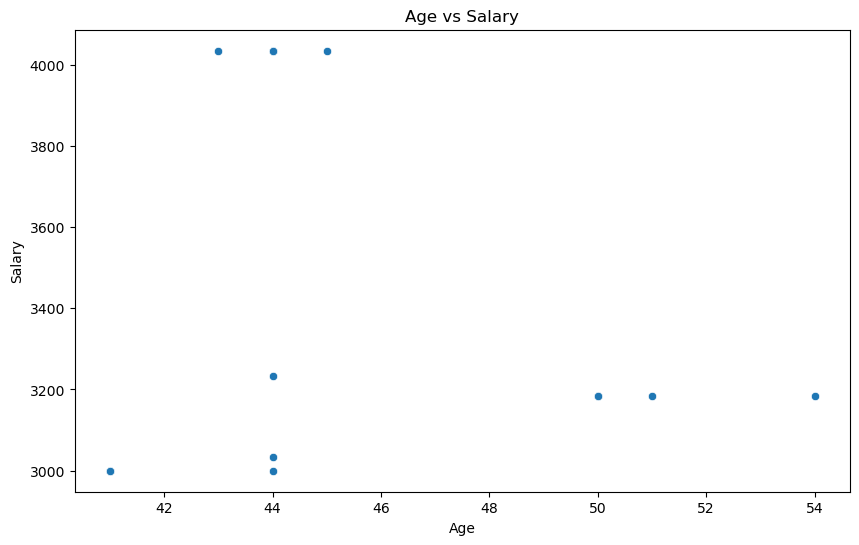

In [17]:
# Filter data with age > 40 and salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
print("\nFiltered Data (Age > 40 and Salary < 5000):")
print(filtered_data)

# Plotting age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()



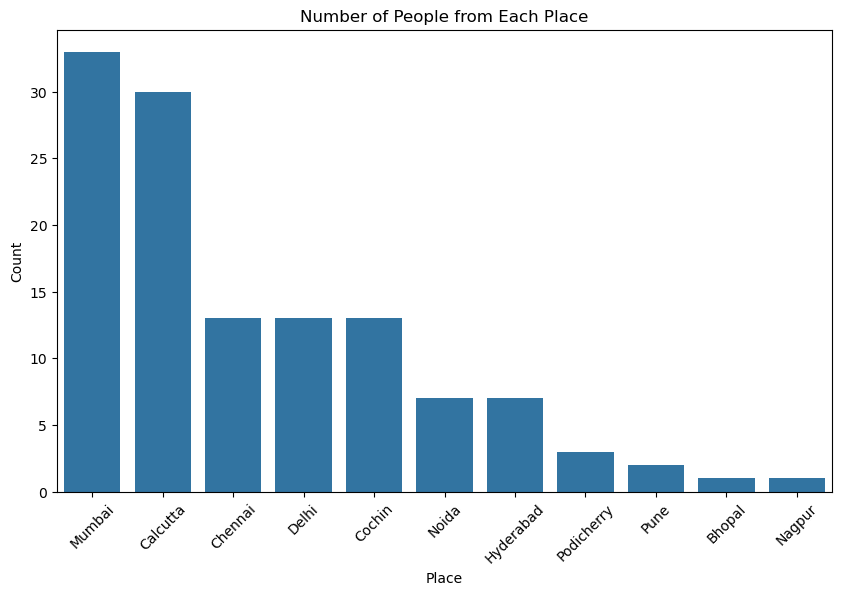

In [18]:
# Count number of people from each place
place_counts = data['Place'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Convert categorical variables into numerical representations
data_encoded = pd.get_dummies(data, drop_first=True)
print("\nEncoded Data:")
print(data_encoded.head())


Encoded Data:
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  \
0           False           True         False     

In [21]:
# Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Assuming 'age' and 'salary' are the features to scale
data_encoded[['Age', 'Salary']] = scaler_standard.fit_transform(data_encoded[['Age', 'Salary']])
data_encoded[['Age', 'Salary']] = scaler_minmax.fit_transform(data_encoded[['Age', 'Salary']])

print("\nScaled Data:")
print(data_encoded.head())


Scaled Data:
        Age    Salary  Gender  Company_Congnizant  Company_Infosys  \
0  0.081081  0.445089       0               False            False   
1  0.351351  0.445089       0               False             True   
2  0.486486  0.137817       0               False            False   
3  0.621622  0.217480       0               False             True   
4  0.162162  0.331285       0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  Place_Hyderabad  \
0           Fals